Tarea 2
Caso de Estudio Netflix Prize

Antes que todo comenzamos con las principales librerías que trabajaremos en el caso

In [365]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Comenzamos con la carga de datos y limpieza de 3 archivos

Primero "Movies"
Segundo "Ratings"
Tercero "Pelicula Limpia"

In [366]:
movies= pd.read_csv("C:/Users/cesgo/OneDrive/Escritorio/Diplomado/Tarea 2- Machine learning/movies.csv")

In [367]:
ratings = pd.read_csv("C:/Users/cesgo/OneDrive/Escritorio/Diplomado/Tarea 2- Machine learning/ratings.csv")

In [368]:
peliculas_limpia = pd.read_excel("C:/Users/cesgo/OneDrive/Escritorio/Diplomado/Tarea 2- Machine learning/Peliculas_limpia.xlsx")

Chequeamos primero que todo que la información se haya subido correctamente, en donde los campos importados son los siguientes

Archivo Movies:

-MovieID: Corresponde al número la identificación de la película
-Title: Titulo y año de la película
-Genres: Genero

Archivo Ratings: 
- UserID: Corresponde al número de usuario de Netflix 
- MovieID:Correponde al número de identificación de la pelicula
- Rating: Calificación entregada por el usuario a la película
- Timestamp: Valor exacto del tiempo transcurrido cuando el usuario realizo la valoración de la película.


In [369]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [370]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


Dentro de las 3 variables generadas, tienen un total de 9742 datos sin nulos

In [371]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Comprobamos que el archivo "Movies" otorga finalmente un muestra de la elección de películas de un total de 9742 elecciones.

In [372]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


Dentro del archivo Ratings, al visualizar los campos del archivo, vemos que nuestra variable clave para unir la información con los otros datasets es "MovieID" 

In [373]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [374]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


Al revisar el dataframe completo podemos ver que no existen valores nulos

In [375]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Lo más importante a destacar es que la muestra obtenida involucra a 100.836 elecciones de rating con un número de usuario equivalente a 610 y que el promedio de las calificaciones o rating proveída es de 3,501. (obviamente este valor nos interesa mucho).

In [376]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Revisamos apriorí si es que existe dentro de los 610 usuarios.. alguno que presente con más frecuecia los ratings y podemos observar que no existe ninguno usuario que pese preponderantemente, ya que el usuario que registra más ratings representa solo un 2,67% con rating otorgado.

In [377]:
ratings['userId'].value_counts().head(10)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: count, dtype: int64

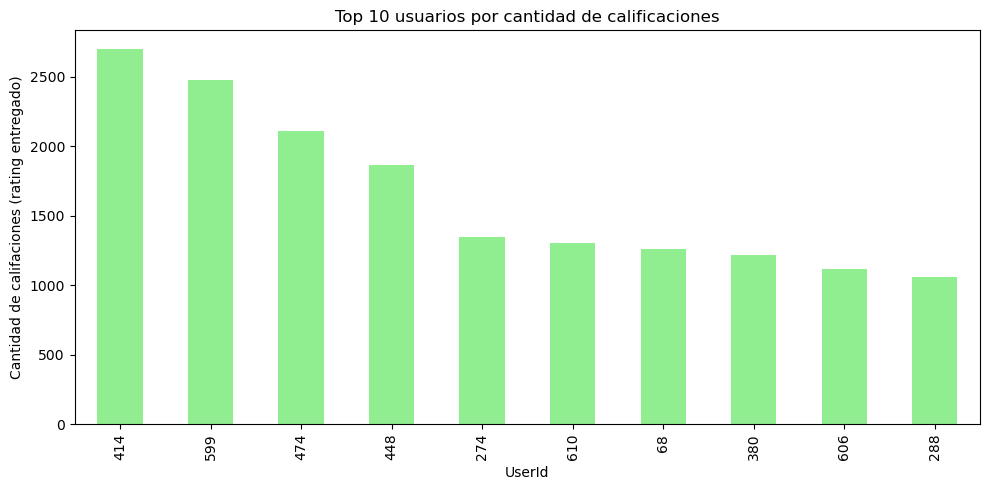

In [378]:
ratings['userId'].value_counts().head(10).plot(
        kind='bar',
        figsize=(10,5),
        title='Top 10 usuarios por cantidad de calificaciones',
        xlabel='UserId',
        ylabel='Cantidad de califaciones (rating entregado)',
        color='lightgreen',
)
plt.tight_layout()
plt.show()
        
        

De igual manera, al observar que la media de los rating equivale a 3,5, podemos ver que la distribución de las calificaciones se encuentra mayoritariamente entre las notas 3 y 4, es decir si sumamos las frecuencias entre las notas 3, 3,5 y 4 nos dará un resultado de 60.001 rating otorgado de un total de 100.836 es decir representa un 59,5% del total de rating otorgados.

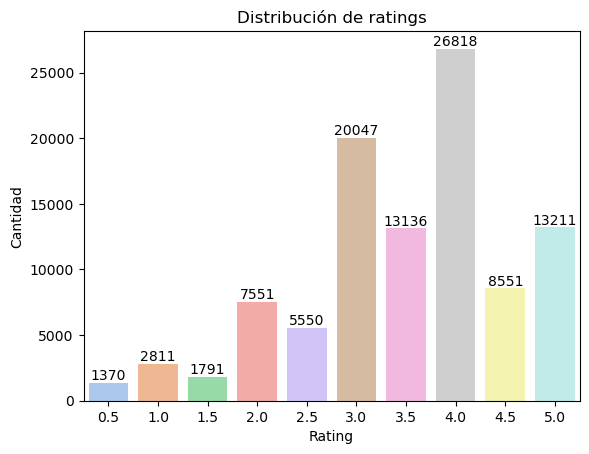

In [379]:
ax=sns.countplot(data=ratings, x='rating', hue='rating', palette='pastel',legend=False)
for x in ax.patches:
    height=x.get_height()
    ax.annotate(f'{height:.0f}',           
                (x.get_x() + x.get_width() / 2., height),
                ha='center', va='bottom')  
plt.title('Distribución de ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()

In [380]:
peliculas_limpia.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_unit
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Seasons
3,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Seasons
4,4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [381]:
peliculas_limpia.tail()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_unit
8802,8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,min
8803,8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2,Seasons
8804,8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,min
8805,8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,min
8806,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,min


In [382]:
peliculas_limpia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      8807 non-null   int64         
 1   show_id         8807 non-null   object        
 2   type            8807 non-null   object        
 3   title           8807 non-null   object        
 4   director        6173 non-null   object        
 5   cast            7982 non-null   object        
 6   country         7976 non-null   object        
 7   date_added      8797 non-null   datetime64[ns]
 8   release_year    8807 non-null   int64         
 9   rating          8800 non-null   object        
 10  duration        8807 non-null   object        
 11  listed_in       8807 non-null   object        
 12  description     8807 non-null   object        
 13  duration_value  8807 non-null   int64         
 14  duration_unit   8807 non-null   object        
dtypes: d

In [383]:
peliculas_limpia.describe()

,Unnamed: 0,date_added,release_year,duration_value
count,8807.000000,8797,8807.000000,8807.000000
mean,4403.000000,2019-05-17 05:59:08.436967168,2014.180198,69.848530
min,0.000000,2008-01-01 00:00:00,1925.000000,1.000000
25%,2201.500000,2018-04-06 00:00:00,2013.000000,2.000000
50%,4403.000000,2019-07-02 00:00:00,2017.000000,88.000000
75%,6604.500000,2020-08-19 00:00:00,2019.000000,106.000000
max,8806.000000,2021-09-25 00:00:00,2021.000000,312.000000
std,2542.506244,NaN,8.819312,50.806431


Ya teniendo el EDA de cada uno de los datasets, comenzaremos con el preprocesamiento de la base de "ratings" cosa de poder construir una matriz de preferencias de los usuarios (como tipo "encuesta") y revisar posteriormente la cantidad de valores faltantes.

In [384]:
matriz_usuarios=ratings.pivot(index='userId',columns='movieId',values='rating')
matriz_usuarios.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como vemos la matriz creada, posee muchos valores faltantes ya que la cantidad de películas indicadas son bastantes y los usuarios por supuesto no tienen la obligación de verlas todas por ende, primero revisaremos el total de faltantes, que equivale a un total de 5.830.804 valores.

In [385]:
print('valores faltantes totales: ',matriz_usuarios.isnull().sum().sum())

valores faltantes totales:  5830804


In [386]:
total_celdas = matriz_usuarios.shape[0] * matriz_usuarios.shape[1]
sparsity = 100 * matriz_usuarios.isnull().sum().sum() / total_celdas
print(f"Sparsity: {sparsity:.2f}%")

Sparsity: 98.30%


Registrando una evidencia de 98,3% de falta de ocupación (por la cantidad de votación según película) 

Existen tres maneras de maneja los valores faltantes

La primera corresponde a rellenar con ceros, como para reflejar que posiblemente las películas evaluadas no son de intéres del usuario

La segunda, eliminar usuarios que tienen muchos NA, cosa de que nos quedaríamos con una base muy reducida

Tercero, promediar los faltantes, que no es el caso, ya que no nos gustaría forzar a que los usuarios tengan rating similares.

Por ende, tomaremos la primera opción y que será compatible con el cluster en evaluación Kmeans.

In [387]:
matriz_usuarios_1 = matriz_usuarios.fillna(matriz_usuarios.mean())

In [388]:
usuarios_activos = ratings['userId'].value_counts()
usuarios_filtrados = usuarios_activos[usuarios_activos > 50].index
matriz_usuarios_1 = matriz_usuarios_1.loc[usuarios_filtrados]

In [389]:
matriz_usuarios_1.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
414,4.0,3.0,4.000000,2.357143,2.000000,3.000000,3.000000,3.000,3.125,3.000000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
599,3.0,2.5,1.500000,2.357143,3.071429,4.500000,2.500000,2.875,1.500,3.500000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
474,4.0,3.0,3.259615,2.357143,1.500000,3.000000,3.000000,2.875,3.125,3.496212,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
448,5.0,3.0,3.000000,2.357143,3.000000,3.946078,3.185185,2.875,3.125,4.000000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
274,4.0,3.5,3.259615,2.357143,3.071429,4.000000,3.185185,3.000,3.125,4.000000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0


Procedemos a estadarizar la matriz que involucra a los rating, para que no interfiera su peso de la variable en este caso rating por aquellas que tienen mayor valor como nota 5, pueda afectar en nuestro análisis.

In [390]:
from sklearn.preprocessing import StandardScaler
matriz_escalada = matriz_usuarios_1.copy()
scaler = StandardScaler()
matriz_escalada = scaler.fit_transform(matriz_escalada)
matriz_escalada = pd.DataFrame(matriz_escalada, 
                             index=matriz_usuarios_1.index,
                             columns=matriz_usuarios_1.columns)


In [391]:
matriz_escalada.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
414,0.171584,-0.948176,1.993781,0.035216,-3.502027,-2.358037,-0.567482,0.818659,-0.011065,-1.104254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
599,-1.619636,-2.043014,-4.734536,0.035216,0.029900,1.397342,-2.100495,0.002160,-9.073106,0.030124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
474,0.171584,-0.948176,0.001164,0.035216,-5.150259,-2.358037,-0.567482,0.002160,-0.011065,0.021530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448,1.962805,-0.948176,-0.697546,0.035216,-0.205562,0.010552,0.000300,0.002160,-0.011065,1.164502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.171584,0.146663,0.001164,0.035216,0.029900,0.145549,0.000300,0.818659,-0.011065,1.164502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ya teniendo la matriz escalada, vamos a proceder a la elección del número de clusters, bajo dos metodologías.
Primero será el método del codo.

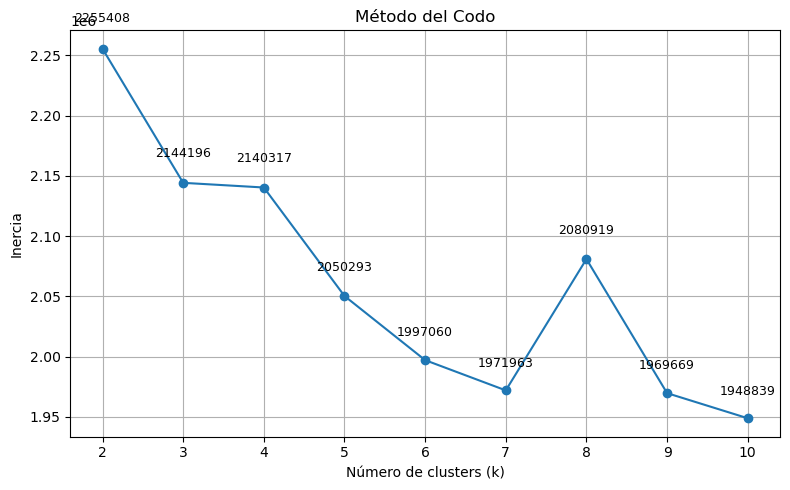

In [392]:
from sklearn.cluster import KMeans

K = range(2, 11)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(matriz_escalada)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='-')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)

for i, valor in enumerate(inertia):
    plt.text(K[i], valor * 1.01, f'{valor:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


Luego de que observamos el método del codo, decidiremos aplicar que los clusters(k) tomen valor de 3 y 4, ya que representan a su vez la mínima distancia en la inercia dentro de los saltos más considerables.

In [393]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(matriz_escalada)
usuarios_clusters_3 = pd.DataFrame({
    'userId':matriz_escalada.index,
    'clusters':clusters
    })

usuarios_clusters_3.head()

,userId,clusters
0,414,1
1,599,2
2,474,1
3,448,1
4,274,1


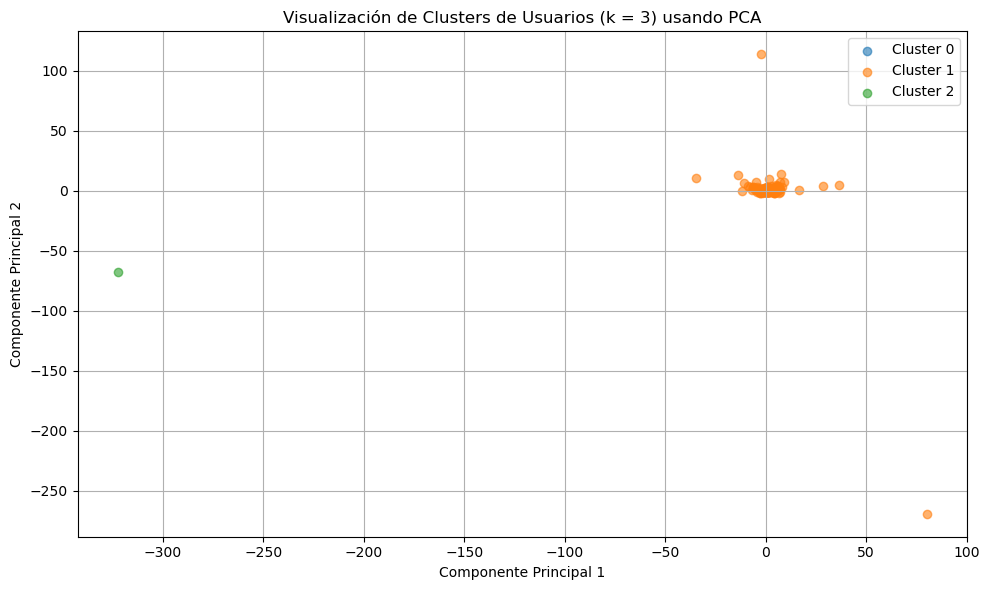

In [394]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(matriz_escalada)

pca_df = pd.DataFrame(pca_resultado, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters


plt.figure(figsize=(10, 6))
for c in sorted(pca_df['cluster'].unique()):
    puntos = pca_df[pca_df['cluster'] == c]
    plt.scatter(puntos['PC1'], puntos['PC2'], label=f'Cluster {c}', alpha=0.6)

plt.title('Visualización de Clusters de Usuarios (k = 3) usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [395]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(matriz_escalada)
usuarios_clusters_4 = pd.DataFrame({
    'userId':matriz_escalada.index,
    'cluster':clusters
    })

usuarios_clusters_4.head()

,userId,cluster
0,414,3
1,599,2
2,474,3
3,448,3
4,274,3


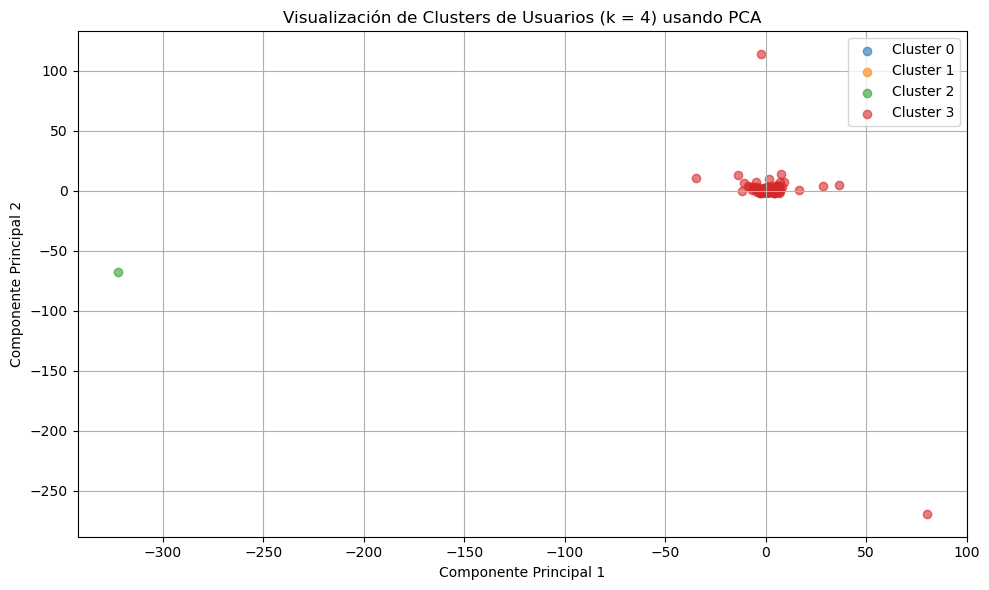

In [396]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(matriz_escalada)

pca_df = pd.DataFrame(pca_resultado, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters


plt.figure(figsize=(10, 6))
for c in sorted(pca_df['cluster'].unique()):
    puntos = pca_df[pca_df['cluster'] == c]
    plt.scatter(puntos['PC1'], puntos['PC2'], label=f'Cluster {c}', alpha=0.6)

plt.title('Visualización de Clusters de Usuarios (k = 4) usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Al correr ambos clusters en Kmean.. nos quedaremos con K=3 dado a que es el que solapa menos cantidad de clusters.

In [397]:
usuarios_clusters_3['clusters'].value_counts().sort_index()

clusters
0      1
1    376
2      1
Name: count, dtype: int64

Ya al intentar utilizar el algoritmo Kmeans, de diferentes formas, visualizamos que el cluster número 1 agrupa la mayoría de los resultados, por ende, para no forzar el modelo como tal, procederemos a utilizar un segundo algoritmo de clustering, el cual este segundo algoritmo es llamado Density-Based Spatial Clustering o en su sigla DBSCAN.

cluster
-1    378
Name: count, dtype: int64


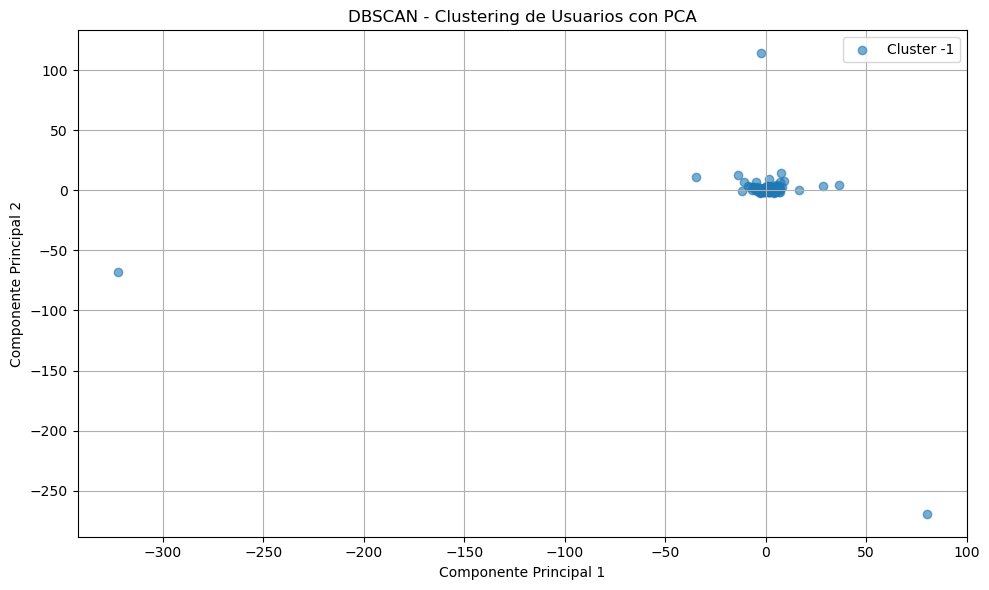

In [398]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


dbscan = DBSCAN(eps=3.0, min_samples=5) 
dbscan_clusters = dbscan.fit_predict(matriz_escalada)


usuarios_dbscan = pd.DataFrame({
    'userId': matriz_usuarios_1.index,
    'cluster': dbscan_clusters
})


print(usuarios_dbscan['cluster'].value_counts().sort_index())

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(matriz_escalada)
pca_df = pd.DataFrame(pca_resultado, columns=['PC1', 'PC2'])
pca_df['cluster'] = dbscan_clusters

plt.figure(figsize=(10, 6))
for c in sorted(pca_df['cluster'].unique()):
    puntos = pca_df[pca_df['cluster'] == c]
    plt.scatter(puntos['PC1'], puntos['PC2'], label=f'Cluster {c}', alpha=0.6)

plt.title('DBSCAN - Clustering de Usuarios con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Al revisar que, a priorí ninguno de los dos algoritmos tanto KMeans como DBSCAN logra determinar claramente los tipos de clusters, entonces aplicaremos una técnica de reducción llamada SVD para buscar patrones ocultos  y reducir su dimensionalidad ( 610 usuarios x 9719 películas) y prácticamente 98% de celdas en cero

In [399]:
matriz_usuarios_2 = matriz_usuarios.fillna(0)

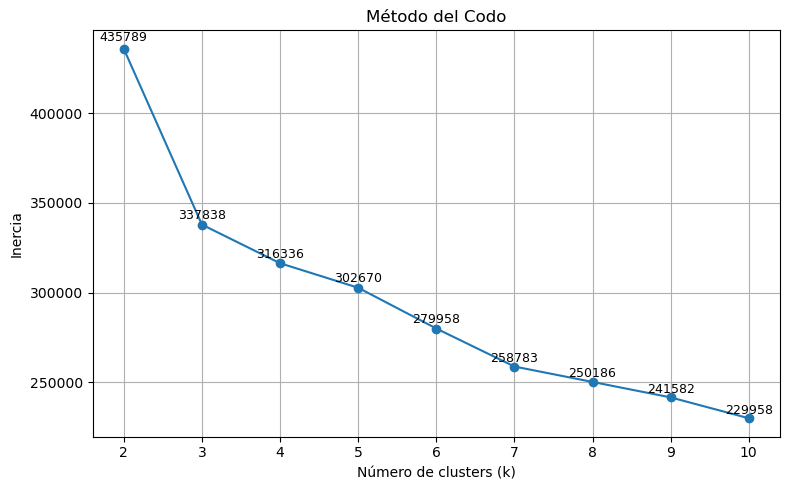

In [400]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=20, random_state=42)
matriz_svd = svd.fit_transform(matriz_usuarios_2)

K = range(2, 11)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(matriz_svd)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='-')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)

for i, valor in enumerate(inertia):
    plt.text(K[i], valor * 1.01, f'{valor:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [401]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_svd = kmeans.fit_predict(matriz_svd)

In [402]:
pd.Series(labels_svd).value_counts().sort_index()

0     81
1     16
2     35
3    379
4     99
Name: count, dtype: int64

Ya como podemos ver, se aplicaron dos algoritmos de clustering no supervisado: KMeans y DBSCAN. 

KMeans fue útil al aplicar reducción de dimensionalidad con SVD, permitiendo identificar 5 clusters diferenciados.

Por otro lado, DBSCAN no entregó buenos resultados: la mayoría de los usuarios fue asignado al cluster -1 (ruido), lo que indica que este algoritmo no fue adecuado para la alta dispersión y sparsidad de la matriz de usuarios. 

Por lo tanto, se justifica continuar el análisis con KMeans como principal método de clustering.

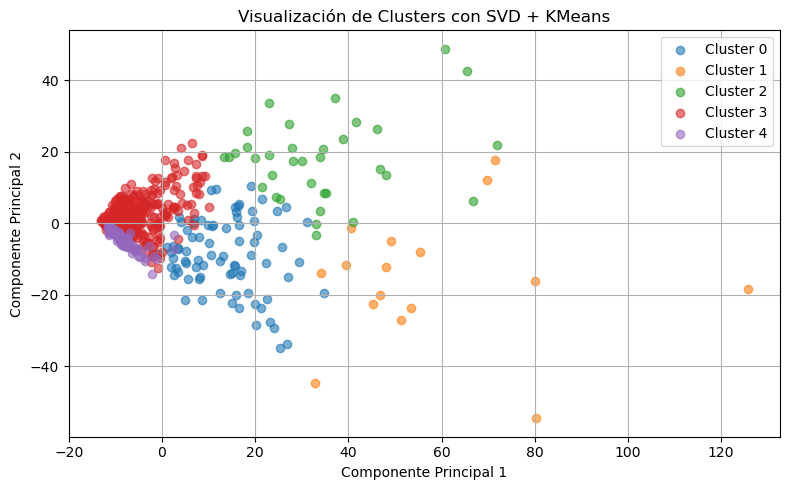

In [403]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

pca_para_visualizar = PCA(n_components=2)
proyeccion_2d = pca_para_visualizar.fit_transform(matriz_svd)

df_visual_svd = pd.DataFrame({
    'PC1': proyeccion_2d[:, 0],
    'PC2': proyeccion_2d[:, 1],
    'cluster': labels_svd  
})


plt.figure(figsize=(8, 5))
for cluster_id in sorted(df_visual_svd['cluster'].unique()):
    puntos = df_visual_svd[df_visual_svd['cluster'] == cluster_id]
    plt.scatter(puntos['PC1'], puntos['PC2'], label=f'Cluster {cluster_id}', alpha=0.6)

plt.title('Visualización de Clusters con SVD + KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Con respecto al resultado del gráfico el cluster número 3 y 4 se evidencia que el componente número 1, tiene menor diferencia entre usuarios y películas es decir menor varianza, en el otro extremo tenemos los cluster número 2 y 5 que poseen mayor varianza por ende son más díficiles de predecir.

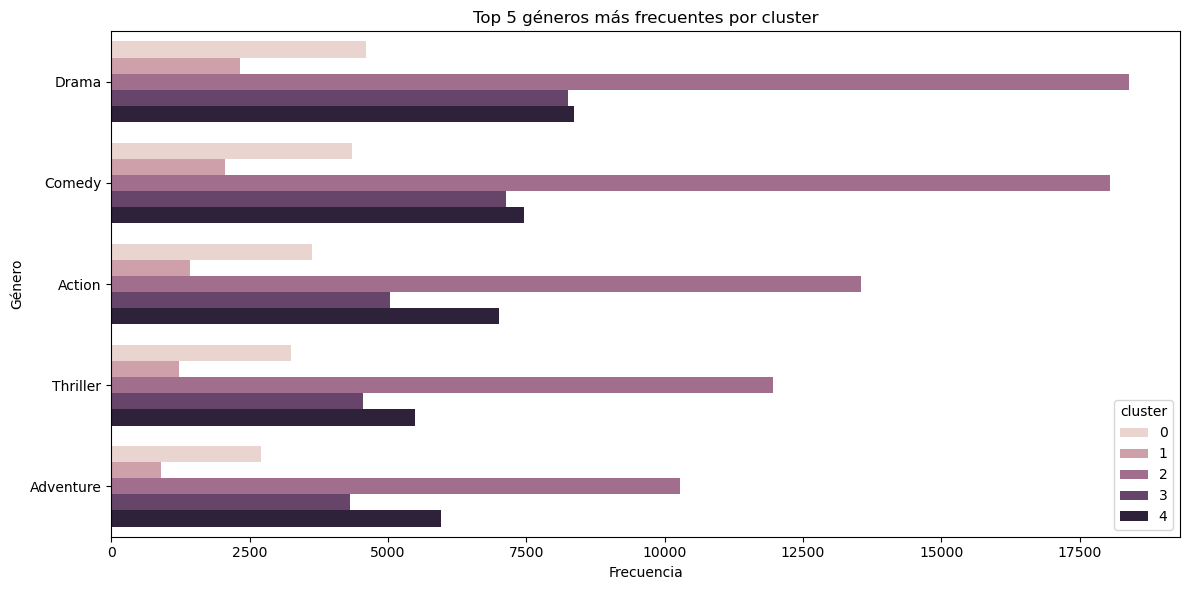

In [404]:

matriz_usuarios_2.columns = matriz_usuarios_2.columns.astype(str)

kmeans = KMeans(n_clusters=5, random_state=42)
matriz_usuarios_2['cluster'] = kmeans.fit_predict(matriz_usuarios_2)


usuarios_clusters = usuarios_clusters.reset_index(drop=True)


usuarios_clusters['userId'] = matriz_usuarios_2.index


ratings_movies_clusters = ratings.merge(movies, on='movieId', how='left') \
                                 .merge(usuarios_clusters, on='userId', how='inner')


generos_por_cluster = ratings_movies_clusters.copy()
generos_por_cluster = generos_por_cluster.dropna(subset=['genres'])
generos_por_cluster['genres'] = generos_por_cluster['genres'].str.split('|')


generos_exploded = generos_por_cluster.explode('genres')
generos_top = generos_exploded.groupby(['cluster', 'genres']).size().reset_index(name='count')
generos_top = generos_top.sort_values(['cluster', 'count'], ascending=[True, False])
generos_top_5 = generos_top.groupby('cluster').head(5)


plt.figure(figsize=(12,6))
sns.barplot(data=generos_top_5, x='count', y='genres', hue='cluster')
plt.title("Top 5 géneros más frecuentes por cluster")
plt.xlabel("Frecuencia")
plt.ylabel("Género")
plt.tight_layout()
plt.show()

In [405]:

generos_por_cluster = ratings_movies_clusters.copy()
generos_por_cluster['genres'] = generos_por_cluster['genres'].str.split('|')
generos_por_cluster = generos_por_cluster.explode('genres')

genero_top = generos_por_cluster.groupby(['cluster', 'genres']).size().reset_index(name='count')
genero_top = genero_top.sort_values(['cluster', 'count'], ascending=[True, False])

for i in sorted(genero_top['cluster'].unique()):
    print(f"\nCluster {i}:")
    print(genero_top[genero_top['cluster'] == i].head(5))


Cluster 0:
    cluster     genres  count
7         0      Drama   4609
4         0     Comedy   4359
0         0     Action   3627
16        0   Thriller   3244
1         0  Adventure   2701

Cluster 1:
    cluster     genres  count
27        1      Drama   2319
24        1     Comedy   2054
20        1     Action   1426
36        1   Thriller   1222
21        1  Adventure    903

Cluster 2:
    cluster     genres  count
47        2      Drama  18390
44        2     Comedy  18049
40        2     Action  13544
56        2   Thriller  11950
41        2  Adventure  10273

Cluster 3:
    cluster     genres  count
67        3      Drama   8254
64        3     Comedy   7136
60        3     Action   5038
76        3   Thriller   4550
61        3  Adventure   4319

Cluster 4:
    cluster     genres  count
87        4      Drama   8356
84        4     Comedy   7455
80        4     Action   7000
81        4  Adventure   5965
96        4   Thriller   5486


Entonces para concluir las recomendaciones generales para Netflix son las siguientes:

En base a los 5 cluster obtenidos, podemos sugerir que si desean mejorar el sistema de recomendaciones, pudimos entender que son los clusters 3 y 4 aquellos que manejan menor varianza y podemos generar mejores recomendaciones entre genero que los podríamos recomendar de la siguiente manera.

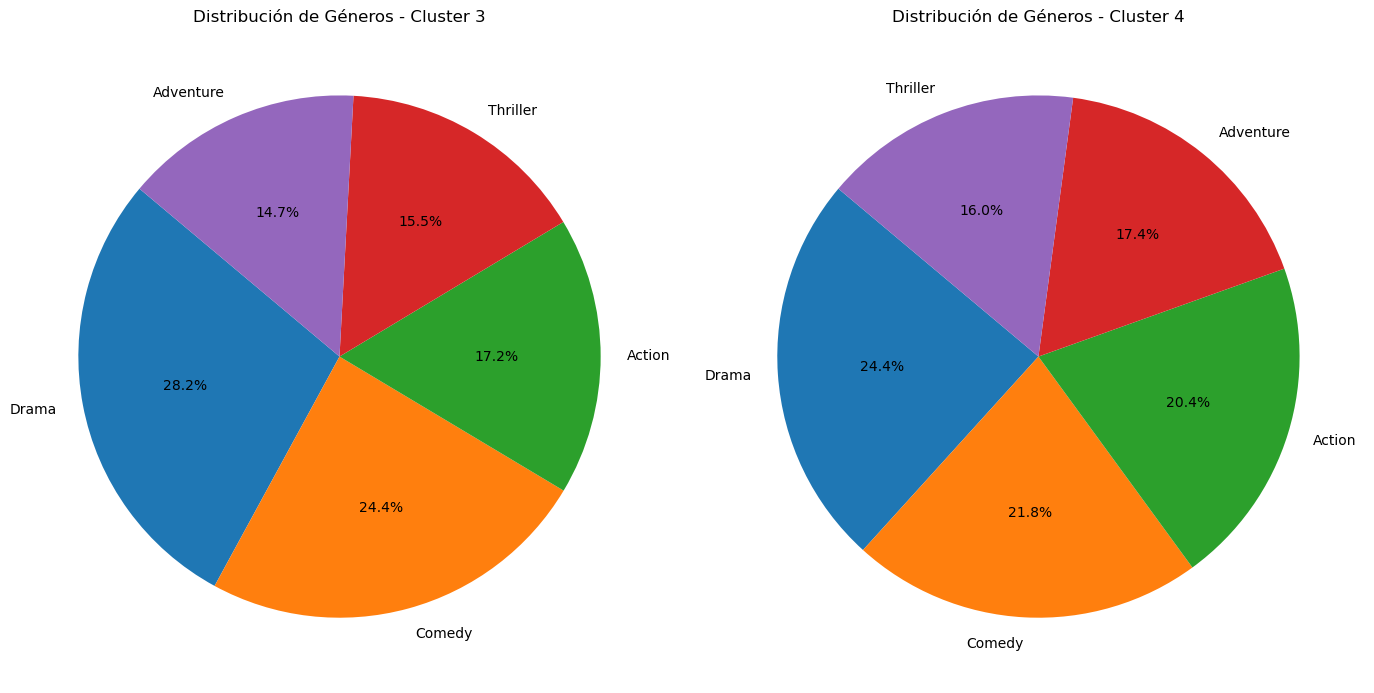

In [406]:

labels_3 = ['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure']
sizes_3 = [8254, 7136, 5038, 4550, 4319]


labels_4 = ['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller']
sizes_4 = [8356, 7455, 7000, 5965, 5486]


fig, axs = plt.subplots(1, 2, figsize=(14, 7))


axs[0].pie(sizes_3, labels=labels_3, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribución de Géneros - Cluster 3')


axs[1].pie(sizes_4, labels=labels_4, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribución de Géneros - Cluster 4')

plt.tight_layout()
plt.show()

Como podemos ver las distribuciones de generos entre los cluster son bastante diferentes, por ejemplo,

Si bien es cierto en ambos Clusters, predominan los generos de Drama, Comedia y Acción.

Existe una clara tendencia en que los usuarios del cluster número 3, marcan una clara preferencia por Drama y Comedia teniendo más del 20% de las preferencias en ambos generos y sólo un 17,2% para acción.

Por otro lado, el Cluster número 4, existe una diferencia entre los 3, principales generos sin embargo, podríamos decir que es menos indiferente, ya que tanto Drama, Comedia y Acción tienen más de un 20% de las preferencias.

Por último, lo que mas se remarca entre ambos clusters es que la relación de preferencias es inversa entre aventura y thriller, es decir Cluster 3 tiene una mayor preferencia de Thriller sobre Aventura mientras que el Cluster número 4 la tendencia es mayor de Aventura sobre Thriller.


Las limitaciones del modelo, ya sabemos que nuestro análisis presenta una mayor varianza para los otros 3 clusteres restantes, evidentemente esto puede ser dado a que podríamos segmentar bastante mejor con la edad de los usuarios o elementos sociodemográficos que pudieron ser limitados dado a la política de protección de datos de los usuarios. Por otro lado, las dificultades que tuvimos inicialmente en la que se utilizaron 2 algoritmos es decir KMean y DBSCAN, a priorí no se pudo obtener grandes resultados, hasta realizar una reducción de dimensionalidad dado a la gran matriz con datos nulos.